In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from nba_api.stats.endpoints.teamvsplayer import TeamVsPlayer

In [2]:
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name

In [5]:
steph_id = find_players_by_full_name("Stephen Curry")[0]['id']
durant_id = find_players_by_full_name("Kevin Durant")[0]['id']
draymond_id = find_players_by_full_name("Draymond Green")[0]['id']
klay_id = find_players_by_full_name("Klay Thompson")[0]['id']

In [6]:
gsw_id = find_teams_by_full_name("Golden State Warriors")[0]['id']

In [19]:
steph_on_off = TeamVsPlayer(vs_player_id=steph_id, team_id=gsw_id, measure_type_detailed_defense="Advanced")

In [30]:
def get_on_off_data(player_id):
    return TeamVsPlayer(
        vs_player_id=player_id,
        team_id=gsw_id,
        measure_type_detailed_defense="Advanced"
    ).get_data_frames()[2]

In [31]:
player_data = [
    (steph_id, 'Stephen Curry'),
    (durant_id, 'Kevin Durant'),
    (draymond_id, 'Draymond Green'),
    (klay_id, 'Klay Thompson')
]

In [32]:
data_dict = {}
for player_id, player_name in player_data:
    data_dict[(player_id, player_name)] = get_on_off_data(player_id)

638.0
812.0
1071.0
379.0
481.0
969.0
1041.0
409.0


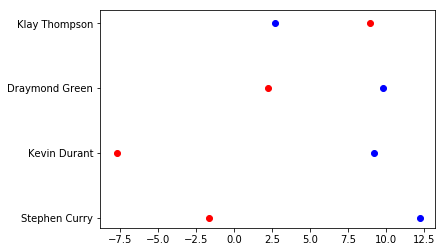

In [54]:
for key in data_dict:
    player_id, player_name = key
    data_frame = data_dict[key]
    on_net_rating = data_frame.loc[data_frame.COURT_STATUS == 'On'].NET_RATING.iloc[0]
    off_net_rating = data_frame.loc[data_frame.COURT_STATUS == 'Off'].NET_RATING.iloc[0]
    print(data_frame.loc[data_frame.COURT_STATUS == 'On'].MIN.iloc[0])
    print(data_frame.loc[data_frame.COURT_STATUS == 'Off'].MIN.iloc[0])
    plt.scatter(x=off_net_rating, y=player_name, c='red')
    plt.scatter(x=on_net_rating, y=player_name, c='blue')

In [37]:
on_off_df = steph_on_off.get_data_frames()[2]

In [51]:
on_off_df.loc[on_off_df.COURT_STATUS == 'Off'].NET_RATING.iloc[0]

-1.7

In [42]:
on_off_df

,GROUP_SET,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,VS_PLAYER_ID,VS_PLAYER_NAME,COURT_STATUS,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PIE,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,OFF_RATING_RANK,DEF_RATING_RANK,NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,PACE_RANK,PIE_RANK,CFID,CFPARAMS
0,Vs. Player,1610612744,GSW,Golden State Warriors,201939,"Curry, Stephen",On,19,15,4,0.789,638.0,116.0,116.4,103.5,104.3,12.5,12.2,0.671,1.89,20.4,0.265,0.759,0.528,0.152,0.581,0.618,106.7,106.07,0.577,2,2,1,1,2,1,1,1,1,1,1,2,1,1,2,1,1,1,1,214,201939
1,Vs. Player,1610612744,GSW,Golden State Warriors,201939,"Curry, Stephen",Off,30,20,10,0.667,812.0,109.9,109.2,108.7,111.0,1.2,-1.7,0.633,1.79,18.8,0.268,0.701,0.498,0.146,0.540,0.577,100.2,99.43,0.511,1,1,2,2,1,2,2,2,2,2,2,1,2,2,1,2,2,2,2,215,201939
